# Frequentist Inference Case Study - Part B

## Learning objectives

Welcome to Part B of the Frequentist inference case study! The purpose of this case study is to help you apply the concepts associated with Frequentist inference in Python. In particular, you'll practice writing Python code to apply the following statistical concepts: 
* the _z_-statistic
* the _t_-statistic
* the difference and relationship between the two
* the Central Limit Theorem, including its assumptions and consequences
* how to estimate the population mean and standard deviation from a sample
* the concept of a sampling distribution of a test statistic, particularly for the mean
* how to combine these concepts to calculate a confidence interval

In the previous notebook, we used only data from a known normal distribution. **You'll now tackle real data, rather than simulated data, and answer some relevant real-world business problems using the data.**

## Hospital medical charges

Imagine that a hospital has hired you as their data scientist. An administrator is working on the hospital's business operations plan and needs you to help them answer some business questions. 

In this assignment notebook, you're going to use frequentist statistical inference on a data sample to answer the questions:
* has the hospital's revenue stream fallen below a key threshold?
* are patients with insurance really charged different amounts than those without?

Answering that last question with a frequentist approach makes some assumptions, and requires some knowledge, about the two groups.

We are going to use some data on medical charges obtained from [Kaggle](https://www.kaggle.com/easonlai/sample-insurance-claim-prediction-dataset). 

For the purposes of this exercise, assume the observations are the result of random sampling from our single hospital. Recall that in the previous assignment, we introduced the Central Limit Theorem (CLT), and its consequence that the distributions of sample statistics approach a normal distribution as $n$ increases. The amazing thing about this is that it applies to the sampling distributions of statistics that have been calculated from even highly non-normal distributions of data! Recall, also, that hypothesis testing is very much based on making inferences about such sample statistics. You're going to rely heavily on the CLT to apply frequentist (parametric) tests to answer the questions in this notebook.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t
from numpy.random import seed
medical = pd.read_csv('insurance2.csv')

In [2]:
medical.shape

(1338, 8)

In [3]:
medical.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1


__Q1:__ Plot the histogram of charges and calculate the mean and standard deviation. Comment on the appropriateness of these statistics for the data.

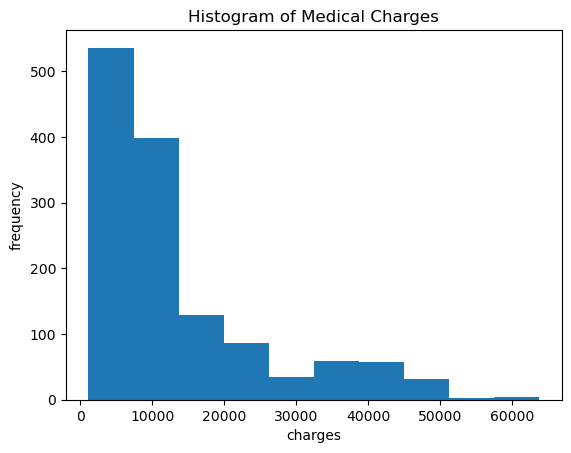

In [4]:
_ = plt.hist(medical['charges'])
_ = plt.xlabel('charges')
_ = plt.ylabel('frequency')
_ = plt.title('Histogram of Medical Charges')
plt.show()

In [5]:
mean_charges = np.mean(medical['charges'])
print (mean_charges)

std_charges = np.std(medical['charges'])
print(std_charges)

13270.422265141257
12105.484975561605


__A:__ The mean and standard deviation may not be the appropriate statistics since the sample data is positively skewed rather than normally distributed. The high outliers may be bringing up the mean, and causing to the standard deviation to be so large.

__Q2:__ The administrator is concerned that the actual average charge has fallen below 12,000, threatening the hospital's operational model. On the assumption that these data represent a random sample of charges, how would you justify that these data allow you to answer that question? And what would be the most appropriate frequentist test, of the ones discussed so far, to apply?

__A:__ Since the sample used is a random sample, it should be fairly representative of the total charges at the hospital. Since we assume the random sample represents the population of total charges at the hospital, we can conduct statistical inference testing to create and test the hypothesis that the averages charges are less than 12,000. A t-statistic test would be a more appropriate frequentist test to use in determining whether or not to reject the hypothesis that the average charges have fallen below 12,000.

__Q3:__ Given the nature of the administrator's concern, what is the appropriate confidence interval in this case? A ***one-sided*** or ***two-sided*** interval? (Refresh your understanding of this concept on p. 399 of the *AoS*). Calculate the critical value and the relevant 95% confidence interval for the mean, and comment on whether the administrator should be concerned.

In [6]:
sample_size = len(medical['charges'])
confidence_level = 0.95

In [7]:
# calculate the critical value
df = sample_size - 1  # Degrees of freedom
alpha = confidence_level  # Significance level
critical_value = t.ppf(alpha, df)

In [8]:
# calculate the confidence interval
margin_of_error = critical_value * (std_charges / np.sqrt(sample_size))
print(margin_of_error)

confidence_interval = (mean_charges - margin_of_error, mean_charges + margin_of_error)
print(confidence_interval)

544.7314053390934
(12725.690859802164, 13815.15367048035)


__A:__ A one-sided interval is appropriate since we are only wanting to see if the average has fallen below 12,000, we are therefor only concerned with intervals to the left of 12,000. After completing the t-test, it seems the administrator should not be concerned since the lower confidence interval of approximately 12725.69 is greater than 12,000 and indicates we should reject the hypothesis that the average charges have fallen below 12,000.

The administrator then wants to know whether people with insurance really are charged a different amount to those without.

__Q4:__ State the null and alternative hypothesis here. Use the _t_-test for the difference between means, where the pooled standard deviation of the two groups is given by:
\begin{equation}
s_p = \sqrt{\frac{(n_0 - 1)s^2_0 + (n_1 - 1)s^2_1}{n_0 + n_1 - 2}}
\end{equation}

and the *t*-test statistic is then given by:

\begin{equation}
t = \frac{\bar{x}_0 - \bar{x}_1}{s_p \sqrt{1/n_0 + 1/n_1}}.
\end{equation}

(If you need some reminding of the general definition of ***t-statistic***, check out the definition on p. 404 of *AoS*). 

What assumption about the variances of the two groups are we making here?

__A:__  
Null hypothesis:  People with insurance are charged a different amount than those without insurance.  
Alternative hypothesis: People with insurance are charged a different amount than those without insurance.  
In order to use the t-test, we assume that the variance is the same for both those with and without insurance.

__Q5:__ Perform this hypothesis test both manually, using the above formulae, and then using the appropriate function from [scipy.stats](https://docs.scipy.org/doc/scipy/reference/stats.html#statistical-tests) (hint, you're looking for a function to perform a _t_-test on two independent samples). For the manual approach, calculate the value of the test statistic and then its probability (the p-value). Verify you get the same results from both.

__A:__ Since the p-value is so small, we should reject the null hypothesis that people with insurance are charged difference amounts than those without insurance.

In [9]:
# isolate the charges for people with insurance, identify how many people have insurance, and calculate the mean and std of their charges
ins = medical[medical['insuranceclaim'] == 1]['charges']

size_ins = len(ins)
print("Number of people with insurance: ", size_ins)

mean_ins = np.mean(ins)
print("Mean of charges for people with insurance: ", mean_ins)

std_ins = np.std(ins, ddof=1)
print("Standard Deviation of charges for people with insurance: ", std_ins)

Number of people with insurance:  783
Mean of charges for people with insurance:  16423.928276537663
Standard Deviation of charges for people with insurance:  14045.928418802127


In [10]:
# isolate the charges for people with no insurance, identify how many people do not have insurance, and calculate the mean and std of their charges
no_ins = medical[medical['insuranceclaim'] == 0]['charges']

size_no_ins = len(no_ins)
print("Number of people without insurance: ", size_no_ins)

mean_no_ins = np.mean(no_ins)
print("Mean of charges for people without insurance: ", mean_no_ins)

std_no_ins = np.std(no_ins, ddof=1)
print("Standard Deviation of charges for people with insurance: ", std_no_ins)

Number of people without insurance:  555
Mean of charges for people without insurance:  8821.421892306294
Standard Deviation of charges for people with insurance:  6446.510126811736


In [11]:
# calculate the pooled standard deviation of the two groups
sp = np.sqrt((((size_ins - 1) * (std_ins ** 2)) + ((size_no_ins - 1) * (std_no_ins ** 2))) / (size_ins + size_no_ins - 2))
print("The pooled standard deviation of the two groups is: ", sp)

The pooled standard deviation of the two groups is:  11520.034268775256


In [12]:
# calculate the t-statistic
manual_t_statistic = (mean_ins - mean_no_ins) / (sp * np.sqrt((1 / size_ins) + (1 / size_no_ins)))
print("The manually calculated t-statistic is: ", manual_t_statistic)

The manually calculated t-statistic is:  11.89329903087671


In [13]:
# calculate the p_value
df = size_ins + size_no_ins - 2
manual_p_value = 2 * (1 - t.cdf(np.abs(manual_t_statistic), df))
print(manual_p_value)

0.0


In [14]:
from scipy.stats import ttest_ind

t_statistic, p_value = ttest_ind(ins, no_ins, equal_var=True)

print("The scipy.stats t-statistic is: ", t_statistic)
print("The scipy.stats p_value is: ", p_value)

The scipy.stats t-statistic is:  11.893299030876712
The scipy.stats p_value is:  4.461230231620717e-31


Congratulations! Hopefully you got the exact same numerical results. This shows that you correctly calculated the numbers by hand. Secondly, you used the correct function and saw that it's much easier to use. All you need to do is pass your data to it.

__Q6:__ Conceptual question: look through the documentation for statistical test functions in scipy.stats. You'll see the above _t_-test for a sample, but can you see an equivalent one for performing a *z*-test from a sample? Comment on your answer.

__A:__ In the documentation for statistical test function in scipy.stats, I did not find an equivalent function for performing a z-test from a sample. 

## Learning outcomes

Having completed this project notebook, you now have good hands-on experience:
* using the central limit theorem to help you apply frequentist techniques to answer questions that pertain to very non-normally distributed data from the real world
* performing inference using such data to answer business questions
* forming a hypothesis and framing the null and alternative hypotheses
* testing this using a _t_-test